In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
thanksgiving = pd.read_csv('thanksgiving.csv', encoding='latin-1')
thanksgiving.sample(5)

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
664,4336639517,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,No,NaN,Rural,45 - 59,Male,Prefer not to answer,South Atlantic
28,4337778119,Yes,Other (please specify),Varies,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,Yes,No,No,NaN,Urban,30 - 44,Female,Prefer not to answer,Pacific
1055,4335943060,Yes,Other (please specify),Duck,Baked,NaN,Rice-based,NaN,None,NaN,...,Yes,Yes,Yes,No,NaN,Urban,60+,Male,"$100,000 to $124,999",Pacific
13,4337878450,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Middle Atlantic
482,4336828331,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,Yes,No,No,NaN,Urban,60+,Male,Prefer not to answer,South Atlantic


In [161]:
thanksgiving.shape
#1058 respondents
#65 questions

(1058, 65)

In [18]:
thanksgiving.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [5]:
thanksgiving['Do you celebrate Thanksgiving?'].value_counts()
#92.6% of respondents celebrate thanksgiving

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [8]:
#we want to focus only on the respondents that do celebrate thanksgiving
#so were filtering out any rows where the answer was 'No'
only_yes = thanksgiving[thanksgiving['Do you celebrate Thanksgiving?'] == 'Yes']
only_yes.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


## Exploring the main dishes

In [9]:
only_yes['What is typically the main dish at your Thanksgiving dinner?'].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

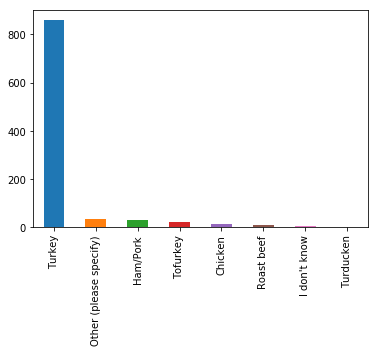

In [10]:
only_yes['What is typically the main dish at your Thanksgiving dinner?'].value_counts().plot.bar()
#by far, most respondents eat turkey

In [166]:
only_yes[only_yes['What is typically the main dish at your Thanksgiving dinner?'] == 'Turkey']['Do you typically have gravy?'].value_counts()
#out of the 859 turkey eaters, 94.8% of them gravy with it

Yes    814
No      45
Name: Do you typically have gravy?, dtype: int64

In [163]:
only_yes[only_yes['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey']['Do you typically have gravy?'].value_counts()
#for those that have tofurkey, 60% of them have it with gravy

Yes    12
No      8
Name: Do you typically have gravy?, dtype: int64

In [14]:
only_yes['How is the main dish typically cooked?'].value_counts()

Baked                     481
Roasted                   378
Other (please specify)     51
Fried                      47
I don't know               17
Name: How is the main dish typically cooked?, dtype: int64

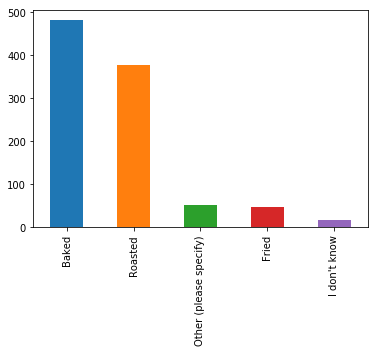

In [17]:
only_yes['How is the main dish typically cooked?'].value_counts().plot.bar()
#most people bake and roast their main dish

In [15]:
only_yes['How is the main dish typically cooked? - Other (please specify)'].value_counts()

Smoked                                7
Grilled                               6
smoked                                5
grilled                               3
Varies as per above                   1
Fried and one baked                   1
Broiled                               1
1 fried 1 roasted                     1
Rotisserie                            1
 Cooked in bourbon and then smokes    1
like soup                             1
stovetop                              1
on the grill                          1
O                                     1
Slow cooked                           1
BBQ'd                                 1
We eat out                            1
baked, grilled, fried                 1
Restaurant with various choices.      1
Cooked on a Weber Charcoal Grill      1
Varies                                1
Grilled on the Weber                  1
always different                      1
Ronco                                 1
Smoked                                1


## Exploring deserts!

In [177]:
#comparing deserts
desert = only_yes[['Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Apple cobbler',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Blondies',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Brownies',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Carrot cake',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cheesecake',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cookies',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Fudge',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Ice cream',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Peach cobbler',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - None',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify)',
       'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1']]

In [178]:
apple_cobbler = desert.iloc[:,0].value_counts()
blondies = desert.iloc[:,1].value_counts()
brownies = desert.iloc[:,2].value_counts()
carrotcake = desert.iloc[:,3].value_counts()
cheesecake = desert.iloc[:,4].value_counts()
cheescake = desert.iloc[:,5].value_counts()
cookies = desert.iloc[:,6].value_counts()
fudge = desert.iloc[:,7].value_counts()
ice_cream = desert.iloc[:,8].value_counts()
peach_cobbler = desert.iloc[:,9].value_counts()

all_desert = [apple_cobbler, blondies, brownies, carrotcake, cheesecake, cookies, fudge, ice_cream, peach_cobbler]
names = ['apple_cobbler', 'blondies', 'brownies', 'carrotcake', 'cheesecake', 'cookies', 'fudge', 'ice_cream', 'peach_cobbler']
all_desert

[Apple cobbler    110
 Name: Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Apple cobbler, dtype: int64,
 Blondies    16
 Name: Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Blondies, dtype: int64,
 Brownies    128
 Name: Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Brownies, dtype: int64,
 Carrot cake    72
 Name: Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Carrot cake, dtype: int64,
 Cheesecake    191
 Name: Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cheesecake, dtype: int64,
 Fudge    43
 Name: Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Fudge, dtype: int64,
 Ice cream    266
 Name: Which of these desserts do you typically have at Tha

## Findings

Most of the respondents had a desert other than what was listed on the survey. But the top deserts were ice cream and cheesecake.

In [19]:
only_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'].value_counts()

Apple    514
Name: Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple, dtype: int64

In [20]:
only_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'].value_counts()

Pumpkin    729
Name: Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin, dtype: int64

In [22]:
only_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'].value_counts()

Pecan    342
Name: Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan, dtype: int64

How many people ate either an apple, pumpkin, or pecan pie?

In [159]:
#calculating how many people ate either a pecan, pumpkin, or apple pie.
apple_isnull = pd.isnull(only_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])
pumpkin_isnull = pd.isnull(only_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
pecan_isnull = pd.isnull(only_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])
no_pies = apple_isnull & pumpkin_isnull & pecan_isnull
no_pies.value_counts()
#806 people - about 82% - eat one of these pies

False    806
True     174
dtype: int64

## Findings

806 respondents ate one of the three pies - pecan, apple, or pumpkin.

## Analyzing age

In [47]:
only_yes.Age.value_counts()
#the ages are in string format
#in order to do analysis ill need to convert them into integers

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64

In [51]:
#transforming the age variable into integers
def extract_age(strng):
    if pd.isnull(strng):
        return None 
    split = strng.split(" ")[0] #splitting and taking only the first number of the range 
    replace = split.replace("+","")
    result = int(replace)
    return result

only_yes['int_age'] = only_yes['Age'].apply(extract_age)
only_yes.int_age.describe()

C:\Users\apont\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64

In [52]:
#new age group
only_yes.int_age.value_counts()

45.0    269
60.0    258
30.0    235
18.0    185
Name: int_age, dtype: int64

## Findings

Because the survey asked participants to answer the age question using a range (e.g. 18-29), the summary stats are incomplete. Taking only the first number of the range will skew the distribution to the left. Nevertheless, the distribution of the age variable seems to be evenly distributed.

## Exploring 'How much total combined money did all members of your HOUSEHOLD earn last year?' variable

In [58]:
only_yes["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()

$25,000 to $49,999      166
$50,000 to $74,999      127
$75,000 to $99,999      127
Prefer not to answer    118
$100,000 to $124,999    109
$200,000 and up          76
$10,000 to $24,999       60
$0 to $9,999             52
$125,000 to $149,999     48
$150,000 to $174,999     38
$175,000 to $199,999     26
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [59]:
#transformation
def transform(strng):
    if pd.isnull(strng):
        return None
    if strng == "Prefer not to answer":
        return None
    
    split = strng.split(" ")[0] #selecting the first value of the range
    replacement = split.replace("$", "")
    replace = replacement.replace(",","")
    return int(replace)
only_yes['int_income'] = only_yes['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(transform)
only_yes['int_income'].describe()

C:\Users\apont\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

## Findings

As with the age variable, we only selected the first value of the given income range. Because we are doing this the salaries will be skewed to the left. After transformation we see that the average income is 75,000 (which is a fairly high salary) and the standard deviation is about 59,000. Due to the transformation well only have a rough approximation of the respondents income.

## Exploring how the distance someone travels for Thanksgiving dinner relates to their income level.

I hypothesize that the people earning less money are younger, and would travel to their parent's houses for Thanksgiving. People earning more money are more likely to have Thanksgiving at their own house as a result. I am going to test this hypothesis by filtering the data based on 'int_income', and seeing what the values in the 'How far will you travel for Thanksgiving?' column are.

In [60]:
only_yes['How far will you travel for Thanksgiving?'].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         396
Thanksgiving is local--it will take place in the town I live in                     276
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    197
Thanksgiving is out of town and far away--I have to drive several hours or fly       82
Name: How far will you travel for Thanksgiving?, dtype: int64

In [67]:
only_yes[only_yes['int_income'] < 150000]['How far will you travel for Thanksgiving?'].value_counts()
#40% are staying home

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64

In [66]:
only_yes[only_yes['int_income'] > 150000]['How far will you travel for Thanksgiving?'].value_counts()
#48% are staying home

Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64

## Findings

It appears that more people with incomes over 150k stay home than those with incomes lower than 150k. It could be due to the fact that younger respondents who are still in college, or just graduated, still go back home for thanksgiving. 

## Exploring friendships and age

There are two variables that directly pertain to friendship, 'Have you ever tried to meet up with hometown friends on Thanksgiving night?', and 'Have you ever attended a "Friendsgiving?"'. In the U.S. "Friendsgiving" is a version of Thanksgiving done only with friends, and it is usually considered seperate from the 'typical' Thanksgiving done at home with the family.

I hypothesize that younger respondents tends to meet with hometown friends and participate in a 'friendsgiving'. I'll test this hypothesis by pivoting the two variables.

In [84]:
#the pivot table will calculate the average age
only_yes.pivot_table(
index=['Have you ever tried to meet up with hometown friends on Thanksgiving night?','Have you ever attended a "Friendsgiving?"'],
values='int_age')

int_age
Have you ever tried to meet up with hometown fr... Have you ever attended a "Friendsgiving?"           
No                                                 No                                         42.283702
                                                   Yes                                        37.010526
Yes                                                No                                         41.475410
                                                   Yes                                        33.976744

In [83]:
only_yes.pivot_table(index=['Have you ever tried to meet up with hometown friends on Thanksgiving night?','Have you ever attended a "Friendsgiving?"'],
values='int_income'
)

int_income
Have you ever tried to meet up with hometown fr... Have you ever attended a "Friendsgiving?"              
No                                                 No                                         78914.549654
                                                   Yes                                        72894.736842
Yes                                                No                                         78750.000000
                                                   Yes                                        66019.736842

## Findings

It appears that the average age and income of respondents tended to be lower for those who meet up with hometown friends and attend a 'friendsgiving'. This confirms my hypothesis that younger people tend to hangout with their hometown friends more during thanksgiving than the older respondents.

## Exploring religious behavior

In [86]:
only_yes['Do you typically pray before or after the Thanksgiving meal?'].value_counts()
#more respondents prayed

Yes    624
No     335
Name: Do you typically pray before or after the Thanksgiving meal?, dtype: int64

In [87]:
only_yes.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served